## Installing and Importing Necessary Modules

In [1]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit-aer
!pip install qiskit-experiments

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 50.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 25.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 45.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.3/343.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.18
    Uninstalling urllib3-1.26.18:
      Successfully uninstalled urllib3-1.26.18
ERROR: pip's de

In [2]:
from numpy import *
from matplotlib.pyplot import *
from scipy.ndimage import gaussian_filter1d

# Importing standard Qiskit libraries
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer, noise, AerSimulator
from qiskit_aer.noise import depolarizing_error, NoiseModel
from qiskit.quantum_info import state_fidelity, Statevector, DensityMatrix, partial_trace
from qiskit_experiments.library import StateTomography
from qiskit_experiments.framework import ExperimentData

# from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit_ibm_runtime import QiskitRuntimeService

# Loading your IBM Quantum account(s)
provider = QiskitRuntimeService(channel="ibm_quantum", token="786ab83c1f9b5535280b9414b2ba912efd79cf4264ccabab0982b47ca2fa4a9460f8994e175a00654be48b678cdbbb65d5a7276a8a0e36edbc761fcf22016aa6")

qiskit_runtime_service.__init__:INFO:2024-10-06 21:25:39,171: Default instance: ibm-q/open/main


## Creating Sample Circuit

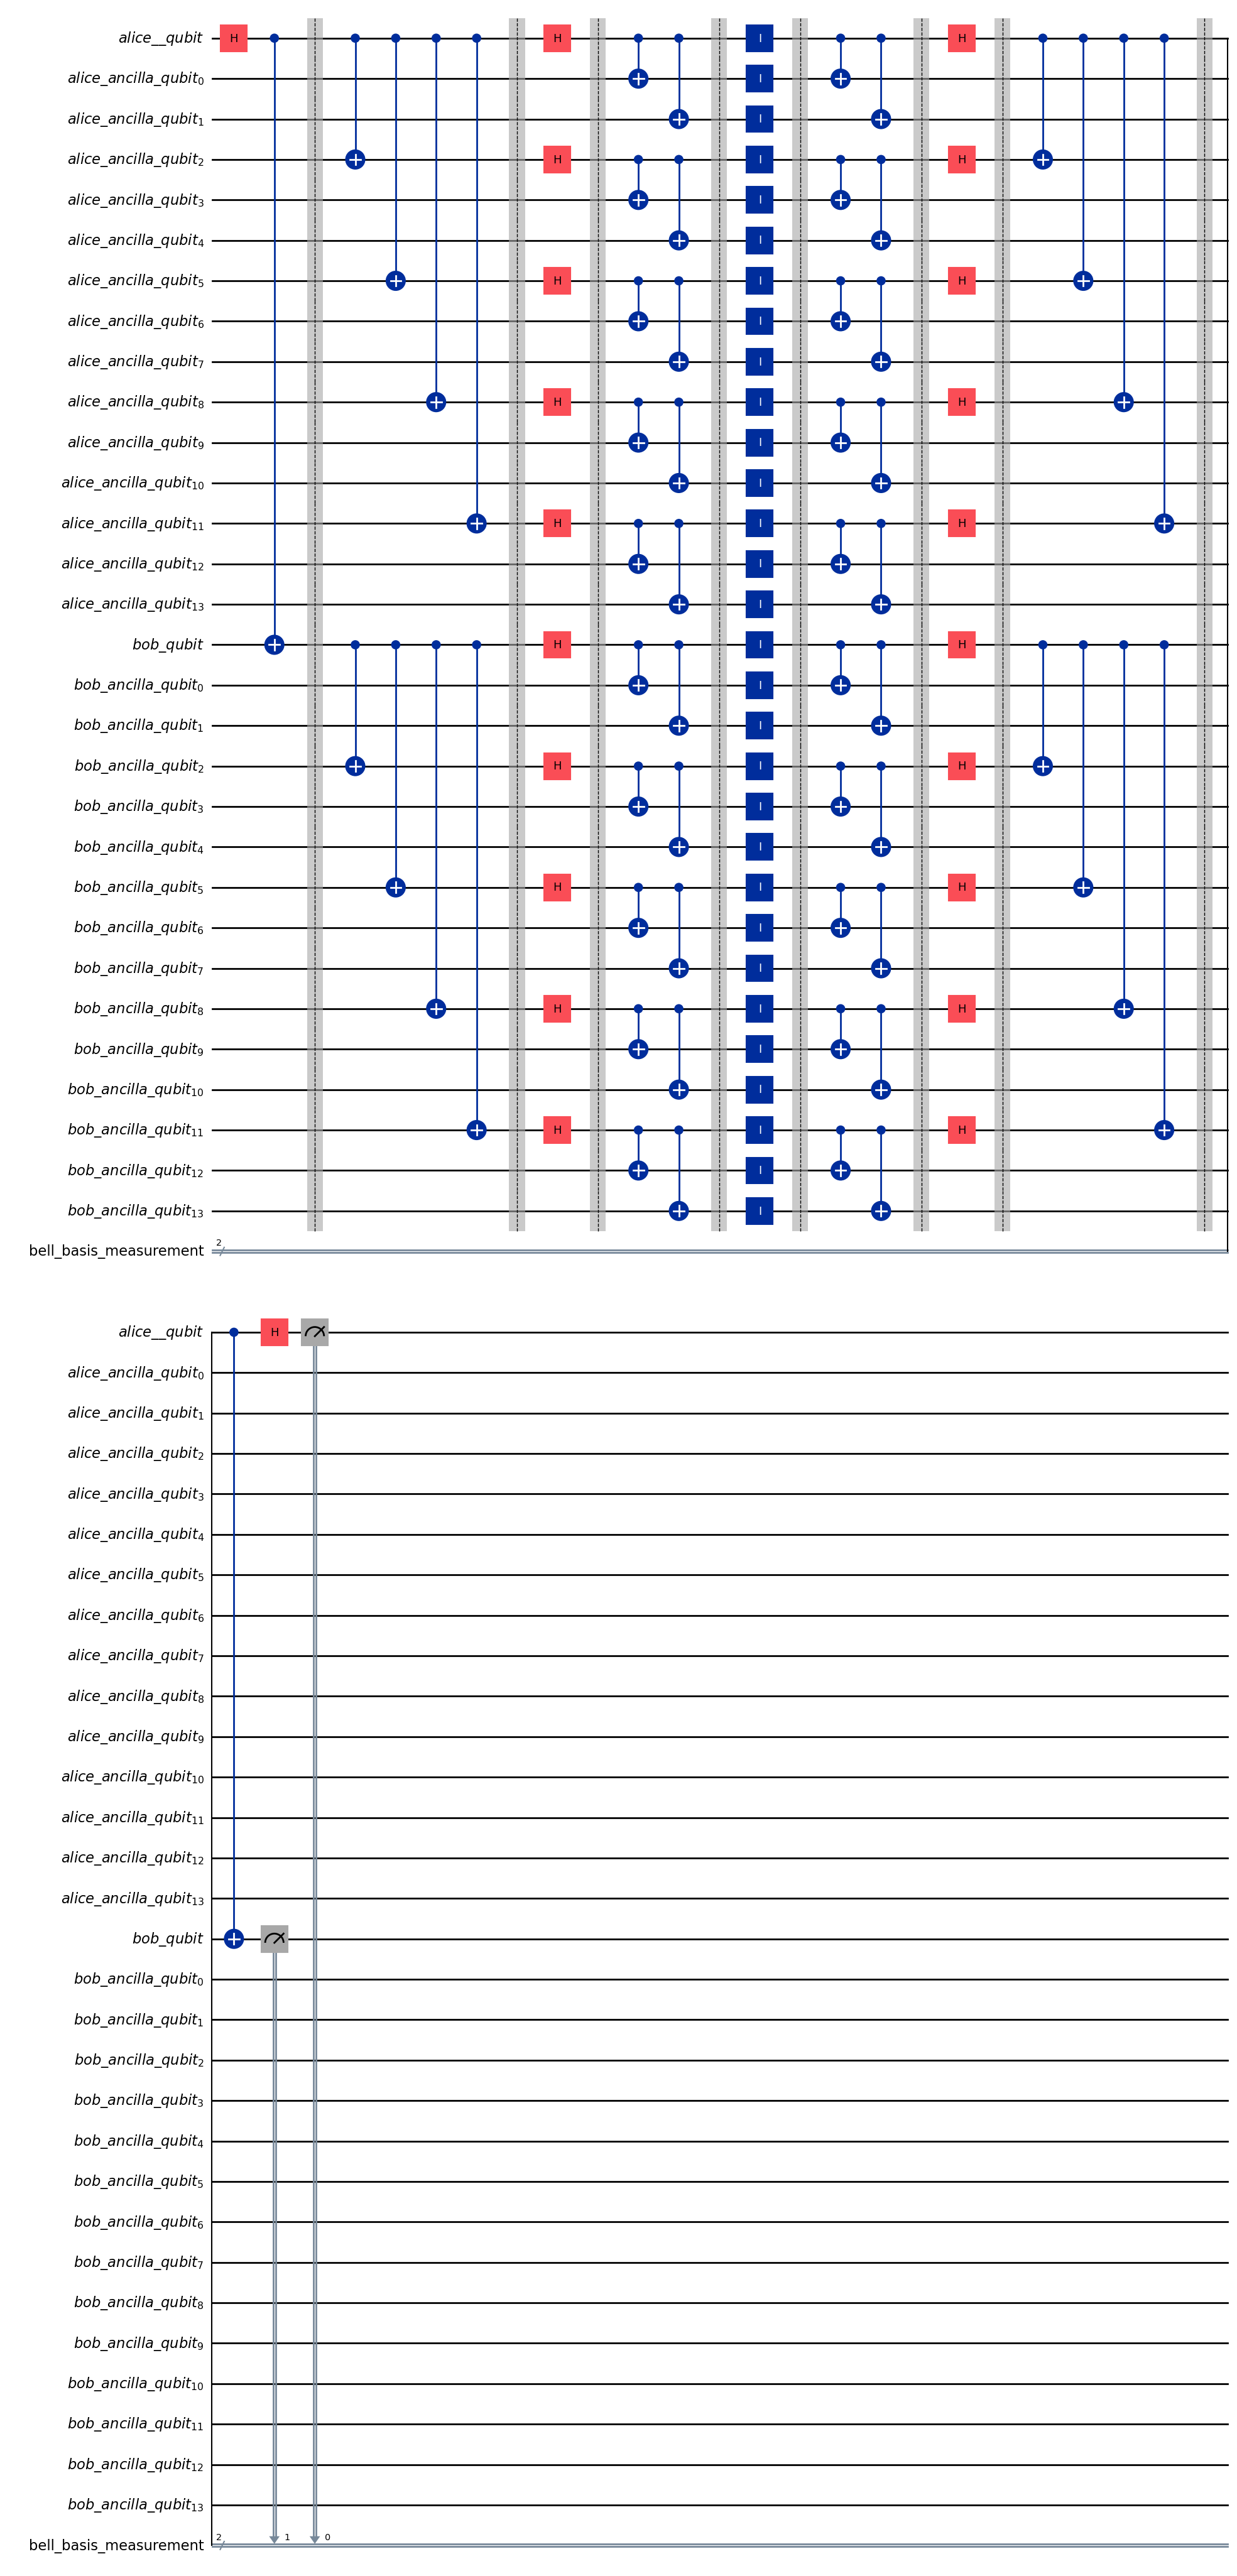

In [4]:
# 15 bit Shor on a bell state

cr = ClassicalRegister(2,"bell_basis_measurement")
alice = QuantumRegister(1, 'alice__qubit')
aq1 = QuantumRegister(14, 'alice_ancilla_qubit')
bob = QuantumRegister(1, 'bob_qubit')
aq2 = QuantumRegister(14, 'bob_ancilla_qubit')

shor15 = QuantumCircuit(alice,aq1,bob,aq2,cr)

shor15.h(0)
shor15.cx(alice[0],bob[0])
shor15.barrier()

shor15.cx(alice[0],aq1[2])
shor15.cx(alice[0],aq1[5])
shor15.cx(alice[0],aq1[8])
shor15.cx(alice[0],aq1[11])

shor15.cx(bob[0], aq2[2])
shor15.cx(bob[0], aq2[5])
shor15.cx(bob[0],aq2[8])
shor15.cx(bob[0],aq2[11])
shor15.barrier()

shor15.h([0,3,6,9,12,15,18,21,24,27])
shor15.barrier()

shor15.cx(alice[0],aq1[0])
shor15.cx(alice[0],aq1[1])
shor15.cx(aq1[2],aq1[3])
shor15.cx(aq1[2],aq1[4])
shor15.cx(aq1[5],aq1[6])
shor15.cx(aq1[5],aq1[7])
shor15.cx(aq1[8],aq1[9])
shor15.cx(aq1[8],aq1[10])
shor15.cx(aq1[11],aq1[12])
shor15.cx(aq1[11],aq1[13])

shor15.cx(bob[0],aq2[0])
shor15.cx(bob[0],aq2[1])
shor15.cx(aq2[2],aq2[3])
shor15.cx(aq2[2],aq2[4])
shor15.cx(aq2[5],aq2[6])
shor15.cx(aq2[5],aq2[7])
shor15.cx(aq2[8],aq2[9])
shor15.cx(aq2[8],aq2[10])
shor15.cx(aq2[11],aq2[12])
shor15.cx(aq2[11],aq2[13])
shor15.barrier()

shor15.id(range(shor15.num_qubits))
shor15.barrier()

shor15.cx(alice[0],aq1[0])
shor15.cx(alice[0],aq1[1])
shor15.cx(aq1[2],aq1[3])
shor15.cx(aq1[2],aq1[4])
shor15.cx(aq1[5],aq1[6])
shor15.cx(aq1[5],aq1[7])
shor15.cx(aq1[8],aq1[9])
shor15.cx(aq1[8],aq1[10])
shor15.cx(aq1[11],aq1[12])
shor15.cx(aq1[11],aq1[13])

shor15.cx(bob[0],aq2[0])
shor15.cx(bob[0],aq2[1])
shor15.cx(aq2[2],aq2[3])
shor15.cx(aq2[2],aq2[4])
shor15.cx(aq2[5],aq2[6])
shor15.cx(aq2[5],aq2[7])
shor15.cx(aq2[8],aq2[9])
shor15.cx(aq2[8],aq2[10])
shor15.cx(aq2[11],aq2[12])
shor15.cx(aq2[11],aq2[13])
shor15.barrier()

shor15.h([0,3,6,9,12,15,18,21,24,27])
shor15.barrier()

shor15.cx(alice[0],aq1[2])
shor15.cx(alice[0],aq1[5])
shor15.cx(alice[0],aq1[8])
shor15.cx(alice[0],aq1[11])

shor15.cx(bob[0], aq2[2])
shor15.cx(bob[0], aq2[5])
shor15.cx(bob[0],aq2[8])
shor15.cx(bob[0],aq2[11])
shor15.barrier()

shor15.cx(alice[0],bob[0])
shor15.h(0)

shor15.measure([alice[0], bob[0]],cr)
shor15.draw(output='mpl')

In [ ]:
# Range of noise levels for one-qubit gates
noise_prob = np.square(np.linspace(0,1,30))
params = 4*noise_prob/3
fidelities = []

for param in params:
    # Create a new noise model with varying one-qubit depolarizing noise
    noise_model = NoiseModel()
    depol_error = depolarizing_error(param, 1)
    
    noise_model.add_all_qubit_quantum_error(depol_error, 'id')
    
    simulator = Aer.get_backend('qasm_simulator')
    circuit = transpile(shor15, simulator,optimization_level=0)

    # Get and print the result
    counts = simulator.run(circuit,noise_model=noise_model,shots=300).result().get_counts()
    for i in range(9):
        count = simulator.run(circuit,noise_model=noise_model,shots=300).result().get_counts()
        counts = {key: count.get(key,0) + counts.get(key,0) for key in set(count) | set(counts)}

    counts = {key: counts[key] / 10 for key in counts}
    print(counts)
    probabilities = {key: count / 300 for key, count in counts.items()}
    
    # Calculate fidelity
    fidelity = probabilities['00']
    fidelities.append(fidelity)

In [ ]:
print(fidelities)

In [ ]:
# Plot the fidelity graph
plot(noise_prob, gaussian_filter1d(fidelities, sigma=1), marker='o')
xlabel('Depolarizing error rate in channel')
ylabel('Fidelity')
title('Fidelity vs. Depolarizing Error Rate in a Shor 15 bit code with interchanging branch numbers')
grid()
legend()

In [11]:
shor15.draw(output='mpl').savefig("/kaggle/working/shor15to15bitcode.png",dpi=400,bbox_inches="tight")